Before doing this, I copied the SDCFlows `epi_mask` function to nilearn's masking module to make the comparison a little easier. This required a few small changes: (1) calculate mean image before creating the mask since `epi_mask` only accepts 3D volumes, and (2) drop the file stuff (i.e., just work on images).

In [1]:
%matplotlib inline
from nilearn import datasets, masking, plotting, image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = datasets.fetch_adhd(n_subjects=1)

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/func.py:438: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


In [3]:
mean_img = image.mean_img(data.func[0])
mask_nil = masking.compute_epi_mask(data.func[0])
mask_sdc = masking.compute_epi_mask_sdc(data.func[0])

<ipython-input-8-4ab8db531995>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


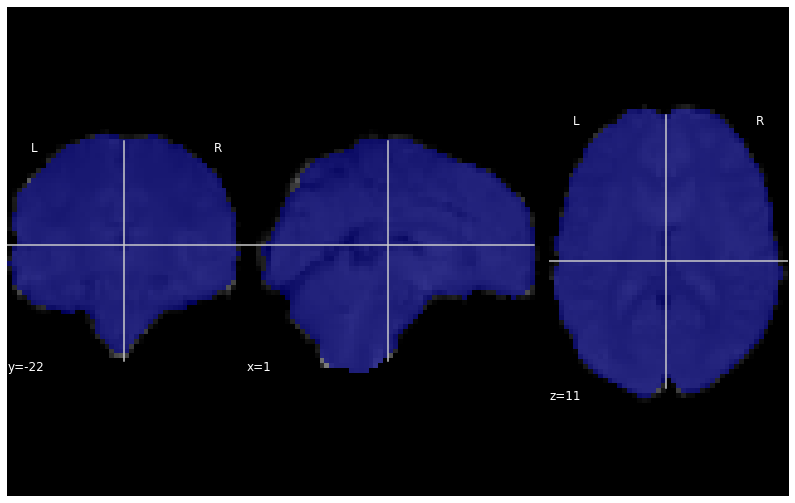

In [8]:
fig, ax = plt.subplots(figsize=(14, 9))
plotting.plot_roi(mask_nil, bg_img=mean_img, axes=ax)
fig.show()

<ipython-input-17-82ed80b1564a>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


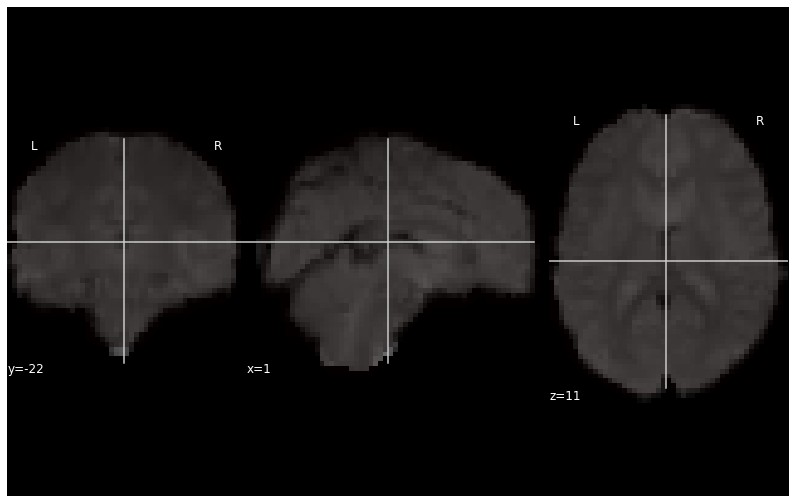

In [17]:
fig, ax = plt.subplots(figsize=(14, 9))
plotting.plot_roi(mask_sdc, bg_img=mean_img, axes=ax, alpha=0.5, cmap='black_pink', vmax=1)
fig.show()

<ipython-input-4-5d2d91a1c357>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


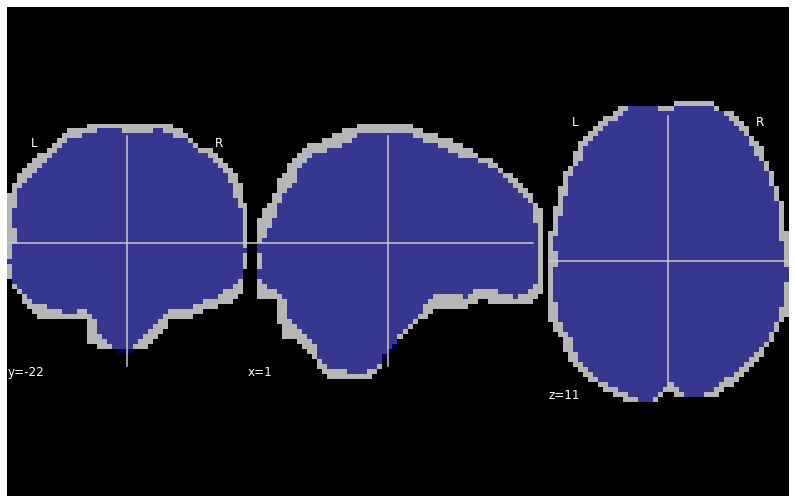

In [4]:
fig, ax = plt.subplots(figsize=(14, 9))
plotting.plot_roi(mask_nil, bg_img=mask_sdc, axes=ax)
fig.show()

<ipython-input-5-34d231b70333>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


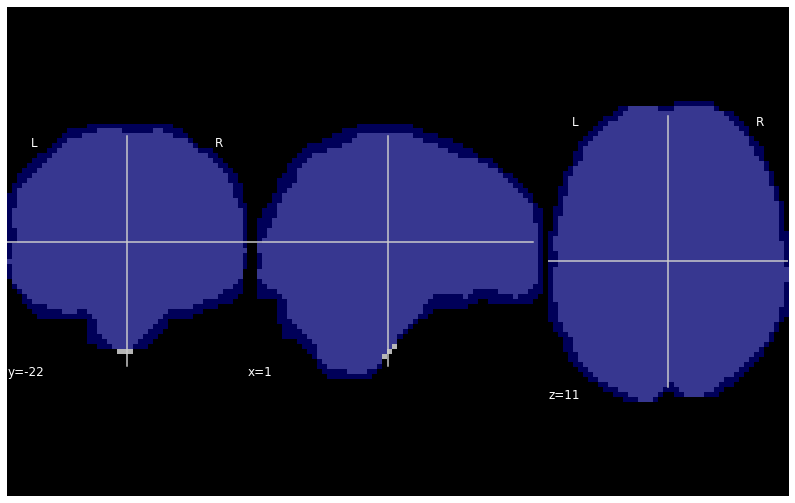

In [5]:
fig, ax = plt.subplots(figsize=(14, 9))
plotting.plot_roi(mask_sdc, bg_img=mask_nil, axes=ax)
fig.show()

In [6]:
np.unique(mask_sdc.get_fdata())

array([0., 1.])

In [7]:
np.unique(mask_nil.get_fdata())

array([0., 1.])